In [3]:
! pip install -q kaggle

In [4]:
from google.colab import files

In [5]:
files.upload()

Saving kaggle.json to kaggle (2).json


{'kaggle.json': b'{"username":"juanjoseramrezcuervo","key":"5b8e56ff9d5e3dd7f2c4d99ce79fb0fe"}'}

In [6]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle competitions download -c champs-scalar-coupling

mkdir: cannot create directory ‘/root/.kaggle’: File exists
champs-scalar-coupling.zip: Skipping, found more recently modified local copy (use --force to force download)


In [7]:
!unzip -o '/content/champs-scalar-coupling.zip'

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: structures/dsgdb9nsd_128302.xyz  
  inflating: structures/dsgdb9nsd_128303.xyz  
  inflating: structures/dsgdb9nsd_128304.xyz  
  inflating: structures/dsgdb9nsd_128305.xyz  
  inflating: structures/dsgdb9nsd_128306.xyz  
  inflating: structures/dsgdb9nsd_128308.xyz  
  inflating: structures/dsgdb9nsd_128309.xyz  
  inflating: structures/dsgdb9nsd_128310.xyz  
  inflating: structures/dsgdb9nsd_128311.xyz  
  inflating: structures/dsgdb9nsd_128312.xyz  
  inflating: structures/dsgdb9nsd_128313.xyz  
  inflating: structures/dsgdb9nsd_128314.xyz  
  inflating: structures/dsgdb9nsd_128315.xyz  
  inflating: structures/dsgdb9nsd_128316.xyz  
  inflating: structures/dsgdb9nsd_128317.xyz  
  inflating: structures/dsgdb9nsd_128318.xyz  
  inflating: structures/dsgdb9nsd_128319.xyz  
  inflating: structures/dsgdb9nsd_128320.xyz  
  inflating: structures/dsgdb9nsd_128321.xyz  
  inflating: structures/dsgdb9nsd_128322.xyz  

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [10]:
#Carga de datos de entranamiento
d = pd.read_csv('train.csv')
d

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant
0,0,dsgdb9nsd_000001,1,0,1JHC,84.807600
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.257000
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.254800
3,3,dsgdb9nsd_000001,1,4,2JHH,-11.254300
4,4,dsgdb9nsd_000001,2,0,1JHC,84.807400
...,...,...,...,...,...,...
4659071,4659071,dsgdb9nsd_133884,17,4,2JHC,3.543450
4659072,4659072,dsgdb9nsd_133884,17,5,3JHC,0.568997
4659073,4659073,dsgdb9nsd_133884,17,6,3JHC,1.173370
4659074,4659074,dsgdb9nsd_133884,17,7,2JHC,4.762010


In [11]:
#Carga de otros sets de datos para adjuntarlos al dataframe principal
dipole = pd.read_csv('dipole_moments.csv')
potential = pd.read_csv('potential_energy.csv')
scalar = pd.read_csv('scalar_coupling_contributions.csv')
dipole.columns=['molecule_name','dipole_moment_X','dipole_moment_Y','dipole_moment_Z']
dipole = dipole.join(potential, rsuffix='other')
d = d.set_index('molecule_name').join(dipole.set_index('molecule_name'))
d = d.set_index('id').join(scalar, rsuffix='other')
del d['molecule_nameother']; del d['atom_index_0other']; del d['atom_index_1other']; del d['typeother']
d

,atom_index_0,atom_index_1,type,scalar_coupling_constant,dipole_moment_X,dipole_moment_Y,dipole_moment_Z,potential_energy,molecule_name,fc,sd,pso,dso
id,,,,,,,,,,,,,
0,1,0,1JHC,84.807600,0.0000,0.0000,0.0,-40.523680,dsgdb9nsd_000001,83.022400,0.254579,1.258620,0.272010
1,1,2,2JHH,-11.257000,0.0000,0.0000,0.0,-40.523680,dsgdb9nsd_000001,-11.034700,0.352978,2.858390,-3.433600
2,1,3,2JHH,-11.254800,0.0000,0.0000,0.0,-40.523680,dsgdb9nsd_000001,-11.032500,0.352944,2.858520,-3.433870
3,1,4,2JHH,-11.254300,0.0000,0.0000,0.0,-40.523680,dsgdb9nsd_000001,-11.031900,0.352934,2.858550,-3.433930
4,2,0,1JHC,84.807400,0.0000,0.0000,0.0,-40.523680,dsgdb9nsd_000001,83.022200,0.254585,1.258610,0.272013
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4659071,17,4,2JHC,3.543450,1.3623,1.4058,-0.0,-364.872596,dsgdb9nsd_133884,3.586440,0.019741,0.150477,-0.213205
4659072,17,5,3JHC,0.568997,1.3623,1.4058,-0.0,-364.872596,dsgdb9nsd_133884,0.674583,-0.007276,0.305078,-0.403388
4659073,17,6,3JHC,1.173370,1.3623,1.4058,-0.0,-364.872596,dsgdb9nsd_133884,1.337470,-0.028423,0.312240,-0.447920


In [12]:
#Conversión de variable categórica de tipo de molecula a variable numérica
def to_onehot(x):
    values = np.unique(x)
    r = np.r_[[np.argwhere(i==values)[0][0] for i in x]]
    return np.eye(len(values))[r].astype(int)

def replace_column_with_onehot(d, col):
    assert sum(d[col].isna())==0, "column must have no NaN values"
    values = np.unique(d[col]
                      )
    k = to_onehot(d[col].values)
    r = pd.DataFrame(k, columns=["%s_%s"%(col, values[i]) for i in range(k.shape[1])], index=d.index).join(d)
    del(r[col])
    return r

col = 'type'
dtype = replace_column_with_onehot(d[[col]].dropna().copy(), col)
d = d.join(dtype)
del d['type']
d

,atom_index_0,atom_index_1,scalar_coupling_constant,dipole_moment_X,dipole_moment_Y,dipole_moment_Z,potential_energy,molecule_name,fc,sd,pso,dso,type_1JHC,type_1JHN,type_2JHC,type_2JHH,type_2JHN,type_3JHC,type_3JHH,type_3JHN
id,,,,,,,,,,,,,,,,,,,,
0,1,0,84.807600,0.0000,0.0000,0.0,-40.523680,dsgdb9nsd_000001,83.022400,0.254579,1.258620,0.272010,1,0,0,0,0,0,0,0
1,1,2,-11.257000,0.0000,0.0000,0.0,-40.523680,dsgdb9nsd_000001,-11.034700,0.352978,2.858390,-3.433600,0,0,0,1,0,0,0,0
2,1,3,-11.254800,0.0000,0.0000,0.0,-40.523680,dsgdb9nsd_000001,-11.032500,0.352944,2.858520,-3.433870,0,0,0,1,0,0,0,0
3,1,4,-11.254300,0.0000,0.0000,0.0,-40.523680,dsgdb9nsd_000001,-11.031900,0.352934,2.858550,-3.433930,0,0,0,1,0,0,0,0
4,2,0,84.807400,0.0000,0.0000,0.0,-40.523680,dsgdb9nsd_000001,83.022200,0.254585,1.258610,0.272013,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4659071,17,4,3.543450,1.3623,1.4058,-0.0,-364.872596,dsgdb9nsd_133884,3.586440,0.019741,0.150477,-0.213205,0,0,1,0,0,0,0,0
4659072,17,5,0.568997,1.3623,1.4058,-0.0,-364.872596,dsgdb9nsd_133884,0.674583,-0.007276,0.305078,-0.403388,0,0,0,0,0,1,0,0
4659073,17,6,1.173370,1.3623,1.4058,-0.0,-364.872596,dsgdb9nsd_133884,1.337470,-0.028423,0.312240,-0.447920,0,0,0,0,0,1,0,0


In [13]:
#Reprocesamiento final de los datos
new_cols = ['atom_index_0', 'atom_index_1', 
       'type_1JHC', 'type_1JHN', 'type_2JHC', 'type_2JHH', 'type_2JHN',
       'type_3JHC', 'type_3JHH', 'type_3JHN', 'dipole_moment_X', 'dipole_moment_Y', 'dipole_moment_Z',
       'potential_energy', 'fc', 'sd', 'pso', 'dso',
       'scalar_coupling_constant']
d = d.reindex(columns=new_cols)
#d = pd.read_csv('train.csv')
#d = d.join(dtype)
#del d['type']
X = d.values[:,:-1]
y = d["scalar_coupling_constant"].values
print (X.shape, y.shape)

(4659076, 18) (4659076,)


In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import median_absolute_error, r2_score, mean_squared_error

In [15]:
Xtr, Xts, ytr, yts = train_test_split(X,y, test_size=0.3)
print (Xtr.shape, ytr.shape, Xts.shape, yts.shape)

(3261353, 18) (3261353,) (1397723, 18) (1397723,)


In [16]:
d

,atom_index_0,atom_index_1,type_1JHC,type_1JHN,type_2JHC,type_2JHH,type_2JHN,type_3JHC,type_3JHH,type_3JHN,dipole_moment_X,dipole_moment_Y,dipole_moment_Z,potential_energy,fc,sd,pso,dso,scalar_coupling_constant
id,,,,,,,,,,,,,,,,,,,
0,1,0,1,0,0,0,0,0,0,0,0.0000,0.0000,0.0,-40.523680,83.022400,0.254579,1.258620,0.272010,84.807600
1,1,2,0,0,0,1,0,0,0,0,0.0000,0.0000,0.0,-40.523680,-11.034700,0.352978,2.858390,-3.433600,-11.257000
2,1,3,0,0,0,1,0,0,0,0,0.0000,0.0000,0.0,-40.523680,-11.032500,0.352944,2.858520,-3.433870,-11.254800
3,1,4,0,0,0,1,0,0,0,0,0.0000,0.0000,0.0,-40.523680,-11.031900,0.352934,2.858550,-3.433930,-11.254300
4,2,0,1,0,0,0,0,0,0,0,0.0000,0.0000,0.0,-40.523680,83.022200,0.254585,1.258610,0.272013,84.807400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4659071,17,4,0,0,1,0,0,0,0,0,1.3623,1.4058,-0.0,-364.872596,3.586440,0.019741,0.150477,-0.213205,3.543450
4659072,17,5,0,0,0,0,0,1,0,0,1.3623,1.4058,-0.0,-364.872596,0.674583,-0.007276,0.305078,-0.403388,0.568997
4659073,17,6,0,0,0,0,0,1,0,0,1.3623,1.4058,-0.0,-364.872596,1.337470,-0.028423,0.312240,-0.447920,1.173370


In [17]:
lr = LinearRegression()
lr.fit(Xtr, ytr)
lr.score(Xtr, ytr), lr.score(Xts, yts)

(0.9999999999944946, 0.999999999994517)

In [18]:
r2_score(yts, lr.predict(Xts))

0.999999999994517

In [19]:
median_absolute_error(yts, lr.predict(Xts))

3.218204964738902e-06

In [20]:
mean_squared_error(yts, lr.predict(Xts))

6.6879108703320546e-09

In [21]:
def rel_mrae(estimator, X, y):
    preds = estimator.predict(X)
    return np.mean(np.abs(preds-y)/y)

In [22]:
rel_mrae(lr, Xtr, ytr), rel_mrae(lr, Xts, yts)

(-7.252618107533845e-08, 4.101648294560935e-07)

In [23]:
preds = lr.predict(Xts)
errors = np.abs(preds-yts)/yts

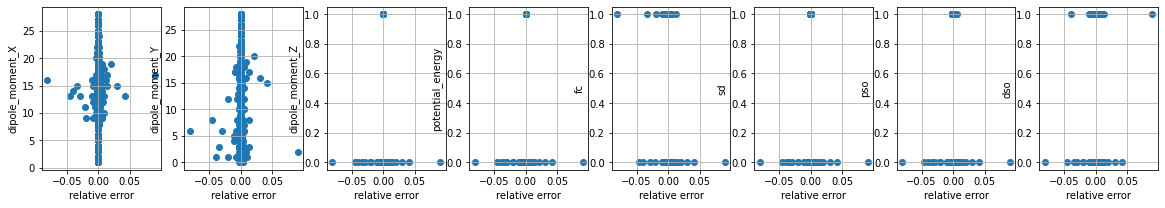

In [24]:
plt.figure(figsize=(20,3))
cols = new_cols[10:-1]
for i,col in enumerate(cols):
    plt.subplot(1,len(cols),i+1)
    plt.scatter(errors, Xts[:,i])
    plt.ylabel(col)
    plt.xlabel("relative error")
    plt.grid();

In [25]:
corrcoefs = pd.DataFrame([np.corrcoef(Xts[:,i], errors)[0,1] for i in range(len(cols))], index=cols, columns=["corrcoef"])
corrcoefs


,corrcoef
dipole_moment_X,0.001334
dipole_moment_Y,-0.000087
dipole_moment_Z,0.001803
potential_energy,0.000234
fc,-0.005338
sd,-0.005510
pso,0.000702
dso,0.004285
